---
# Ejercicio 5
**a)** Considere que es sencillo generar una variable aleatoria a partir de cualquiera de las distribuciones $F_i, i = 1,...,n$. Explique cómo generar variables aleatorias a partir de las siguientes distribuciones.

**Sugerencia** Si $X_i , i = 1,...,n$, son variables aleatorias independientes, donde $Xi$ tiene distribución $Fi$
, ¿cuál variable aleatoria tiene como distribución a $F$ en cada caso?


$$
\displaystyle F_M(x) = \prod_{i=1}^n F_i(x)
$$

Tenemos que:
$$
\begin{align*}
    \displaystyle F_M(x) &= \prod_{i=1}^n F_i(x)\\[0.4cm]
    &= F_1(x) \ldots F_n(x)
\end{align*}
$$

Como $F_i(x)m i=1,\ldots,n$, distribución de $X_i$ y los $X_i$ 's son independientes tenemos que:
$$
F_i(x) = P(X_i \leq x), \quad i=1,\ldots,n 
$$

Sea M a la variable aleatoria que es el máximo de las $X_i$:
$$
M = máx\{X_1,X_2,\ldots,X_n\}
$$
Luego su función de distribución acumulada está dada por:

$$
\displaystyle F_M(x) = \prod_{i=1}^n F_i(x), \quad EUREKA
$$

Luego para generar la variable aleatoria $M$ debemos seleccionar el máximo $X_i$

In [17]:
from typing import Callable
from random import random
from math import log
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
def M(Xs:list[Callable[[],float]]) -> float:
    """
    Variable aleatoria Máx{X_1,...,X_n}

    Args:
        Xs (list[Callable[[],float]]): Lista de variables aleatorias

    Returns:
        float: Máximo valor generado por las variables aleatorias
    """    
    samples = [X_i() for X_i in Xs]
    return max(samples)

def M_simulation(xs: list[float]) -> float:
    """
    Variable aleatoria Máx{X_1,...,X_n}

    Args:
        Xs (list[float]]): Lista de muestras aleatorias

    Returns:
        float: Máximo valor generado por las muestras aleatorias
    """    
    return max(xs)

$$
\displaystyle F_m(x) = 1 - \prod_{i=1}^n (1 - F_i(x))
$$

Tenemos por definición que $F_i(x) = P(X_i \leq x)$, luego:
$$
\begin{align*}
    \displaystyle F_m(x) &= 1 - \prod_{i=1}^n (1 - F_i(x)) \quad\textbf{(1)} \\[0.3cm]
    &= 1 - \prod_{i=1}^n (1 - P(X_i \leq x)) \\[0.3cm]
    &= 1- \prod_{i=1}^n P(X_i > x) \quad\textbf{(2)}\\
\end{align*}
$$

Por otro lado como $\displaystyle P(min(X_1,\ldots, X_n) > x) = P(X_1 > x,\ldots, X_n > x) = \prod_{i=1}^n(1-F_i(x)) \quad \textbf{(3)} $

Por **(1)** y **(2)** y **(3)** $ \displaystyle \Longrightarrow P(min(X_1,\ldots, X_n) > x) = 1 - P(min(X_1,\ldots, X_n) \leq x)$ 

donde $min\{X_1,\ldots,X_n\} = m \quad \text{variable aleatoria}$

Luego $\displaystyle P(m > x) = \prod_{i=1}^n(1-F_i(x)) = 1 - P(m \leq x)$



In [33]:
def m(Xs:list[Callable[[],float]]) -> float:
    """
    Variable aleatoria Min{X_1,...,X_n}

    Args:
        Xs (list[Callable[[],float]]): Lista de variables aleatorias

    Returns:
        float: Máximo valor generado por las variables aleatorias
    """    
    samples = [X_i() for X_i in Xs]
    return min(samples)

def m_simulation(xs: list[float]) -> float:
    """
    Variable aleatoria Min{X_1,...,X_n}

    Args:
        Xs (list[float]]): Lista de muestras aleatorias

    Returns:
        float: Máximo valor generado por las muestras aleatorias
    """    
    return min(xs)

**b)** Genere una muestra de 10 valores de las variables $M$ y $m$ con distribuciones $F_M$ y $F_m$ si $X_i$ son
exponenciales independientes con parámetros 1, 2 y 3 respectivamente.

In [34]:
def exponential(lamda:float) -> float:
    """
    Variable aleatoria con distribución exponencial de parámetro lambda

    Args:
        lamda (float): parámetro de la distribución

    Returns:
        float: valor aleatorio
    """
    U = 1 - random()
    return -log(U)/lamda

In [51]:
#Usando 10 muestras
Nsamples = 10
Xs = [
    lambda: exponential(lamda=1),
    lambda: exponential(lamda=1/2),
    lambda: exponential(lamda=1/3)
]

M_samples = [M(Xs=Xs) for _ in range(Nsamples)] 
m_samples = [m(Xs=Xs) for _ in range(Nsamples)]

print(f"[Muestras M] -> {M_samples}")
print(f"[Muestras m] -> {m_samples}" )

[Muestras M] -> [5.032208867182478, 1.0909741316486257, 11.994859988032651, 1.9811217347279668, 2.4432413428512008, 4.658351735352485, 4.4478721279173605, 4.606142490400777, 1.7998212631967376, 1.9223312388521645]
[Muestras m] -> [0.42923338735007716, 1.3294661901552776, 1.0395644842832708, 0.009166252655439508, 0.19727358686800373, 0.2981477257784472, 0.8499072171106653, 0.09293273056913082, 0.05120507273030546, 0.13686304760110193]


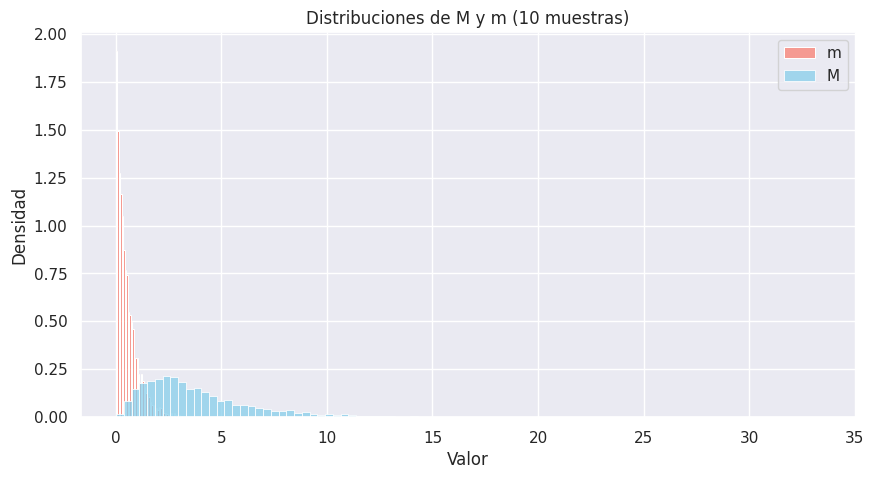

In [40]:
#Usando 5000 muestras de las generadas por las exponenciales
Nsamples = 5000
Xs = [
    lambda: exponential(lamda=1),
    lambda: exponential(lamda=1/2),
    lambda: exponential(lamda=1/3)
]

M_samples = []
m_samples = []
for _ in range(Nsamples):
    sample = [X_i() for X_i in Xs]
    M_samples.append(M_simulation(xs=sample))
    m_samples.append(m_simulation(xs=sample))


sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.histplot(m_samples, stat='density', label="m", color="salmon")
sns.histplot(M_samples, stat='density', label="M", color="skyblue")
plt.title("Distribuciones de M y m (10 muestras)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()